In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
#filename = 'root_files/histo_2Electrons_20893_mtdclusters.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff.root'
filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff_100GeV.root'
file = uproot.open(filename)

In [3]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
ETLclusters = file["ticlNtuplizer/ETL"]

In [5]:
#simtrackstersCP.keys()

In [6]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()

SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()

In [7]:
ETL_time    = ETLclusters["mtd_clusters_time"].array()
ETL_timeErr = ETLclusters["mtd_clusters_timeErr"].array()

In [8]:
CP_vm = simtrackstersCP["vertices_multiplicity"].array()
SC_vm = simtrackstersSC["vertices_multiplicity"].array()

In [9]:
SC_vx = simtrackstersSC["vertices_x"].array()
SC_vy = simtrackstersSC["vertices_y"].array()
SC_vz = simtrackstersSC["vertices_z"].array()
SC_ve = simtrackstersSC["vertices_energy"].array()
SC_vi = simtrackstersSC["vertices_indexes"].array()
SC_vt = simtrackstersSC["vertices_time"].array()

SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_be = simtrackstersSC["raw_energy"].array()

CP_vx = simtrackstersCP["vertices_x"].array()
CP_vy = simtrackstersCP["vertices_y"].array()
CP_vz = simtrackstersCP["vertices_z"].array()
CP_ve = simtrackstersCP["vertices_energy"].array()
CP_vi = simtrackstersCP["vertices_indexes"].array()
CP_vt = simtrackstersSC["vertices_time"].array()

CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()
CP_be = simtrackstersCP["raw_energy"].array()

In [10]:
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_err = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time = simtrackstersSC["MTDtime"].array()
SC_MTD_err = simtrackstersSC["MTDtimeError"].array()

CP_CALO_time = simtrackstersSC["time"].array()
CP_CALO_err = simtrackstersSC["timeError"].array()
CP_boundary_time = simtrackstersSC["BoundaryTime"].array()
CP_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
CP_MTD_time = simtrackstersSC["MTDtime"].array()
CP_MTD_err = simtrackstersSC["MTDtimeError"].array()

In [11]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

In [12]:
def hist(X, weights=None, bins=30, title='title', xlabel='time (ns)', ylabel='Counts'):
    plt.figure(dpi=100)
    if weights == None:
        plt.hist(ak.flatten(X), bins=bins, color='dodgerblue')
    else:
        plt.hist(ak.flatten(X), bins=bins, color='dodgerblue', weights=ak.flatten(weights))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [13]:
def scatter(X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    plt.figure(dpi=100)
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [14]:
def subplot(axs, X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts'):
    #bins=ak.sum(X>-98)
    axs.hist(ak.flatten(X), bins=bins, color='dodgerblue')
    axs.set_title(title)
    axs.grid()

In [85]:
#ak.count(SC_CALO_time)
#ak.sum(SC_CALO_time>-98)//100
#len(ak.flatten(SC_MTD_time))

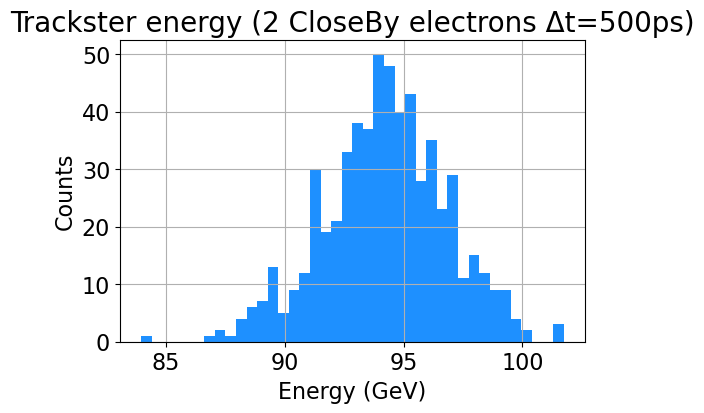

In [15]:
hist(SC_be, bins=40, title='Trackster energy (2 CloseBy electrons Δt=500ps)', xlabel='Energy (GeV)')

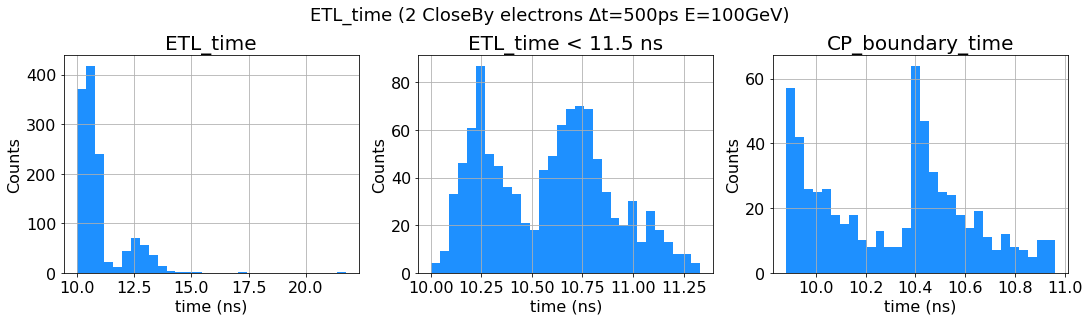

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('ETL_time (2 CloseBy electrons Δt=500ps E=100GeV)', size=18, y=1.05)

subplot(axs[0], ETL_time, title='ETL_time')
axs[0].set_title('ETL_time')
subplot(axs[1], ETL_time[ETL_time<11.5], title='ETL_time < 11.5 ns')
subplot(axs[2], CP_boundary_time, title='CP_boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

In [18]:
#from x,y,z to R
mask = (CP_vt>-80)# & (CP_ve<1.1) & (CP_ve>1)

vector = vec.awk({"x": CP_vx[mask], 
                  "y": CP_vy[mask], "z": CP_vz[mask]})
R = (vector.eta**2 + vector.phi**2)**0.5

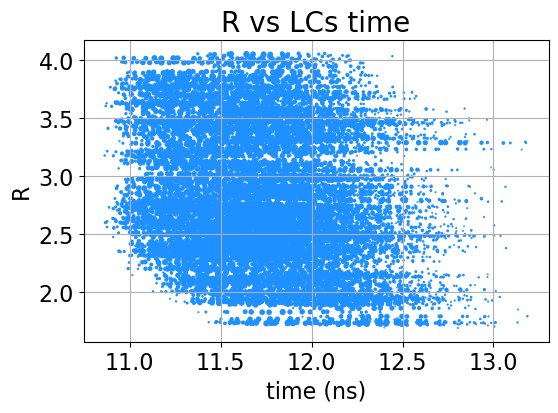

In [20]:
scatter(ak.flatten(CP_vt[mask]), ak.flatten(R), title='R vs LCs time', ylabel='R', s=ak.flatten(CP_ve[mask]))

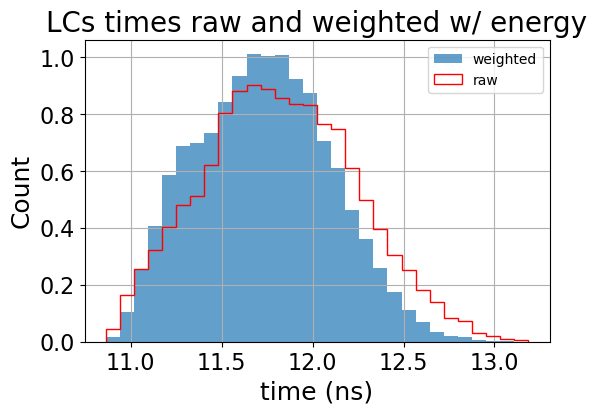

In [21]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ak.flatten(CP_vt)[ak.flatten(CP_vt) > -80]), weights=ak.flatten(ak.flatten(CP_ve)[ak.flatten(CP_vt) > -80]), bins=30, density=True, label='weighted', alpha=.7)
plt.hist(ak.flatten(ak.flatten(CP_vt)[ak.flatten(CP_vt) > -80]), bins=30, density=True, label='raw', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('LCs times raw and weighted w/ energy')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

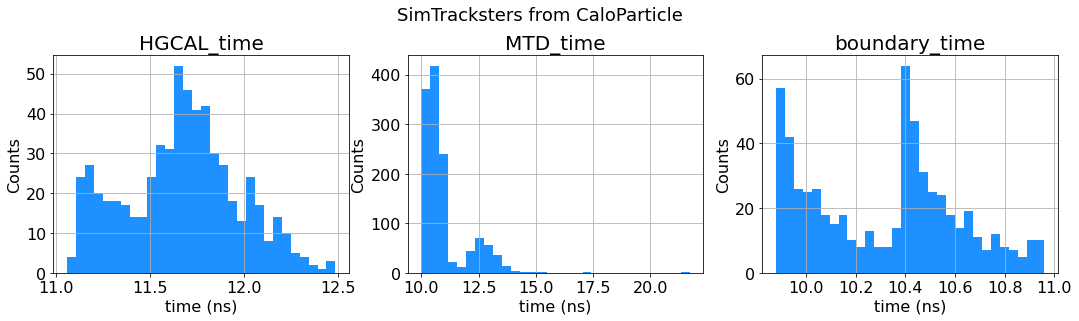

In [22]:
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
# fig.suptitle('SimTracksters from SimClusters', size=18, y=1.05)

# subplot(axs[0], SC_CALO_time, title='HGCAL_time')
# axs[0].set_title('HGCAL_time')
# subplot(axs[1], ETL_time, title='MTD_time')
# subplot(axs[2], SC_boundary_time, title='boundary_time')

# for ax in axs.flat:
#     ax.set_xlabel('time (ns)', fontsize = 16.0)    
#     ax.set_ylabel('Counts', fontsize = 16.0)
#-------
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[0], CP_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
subplot(axs[2], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

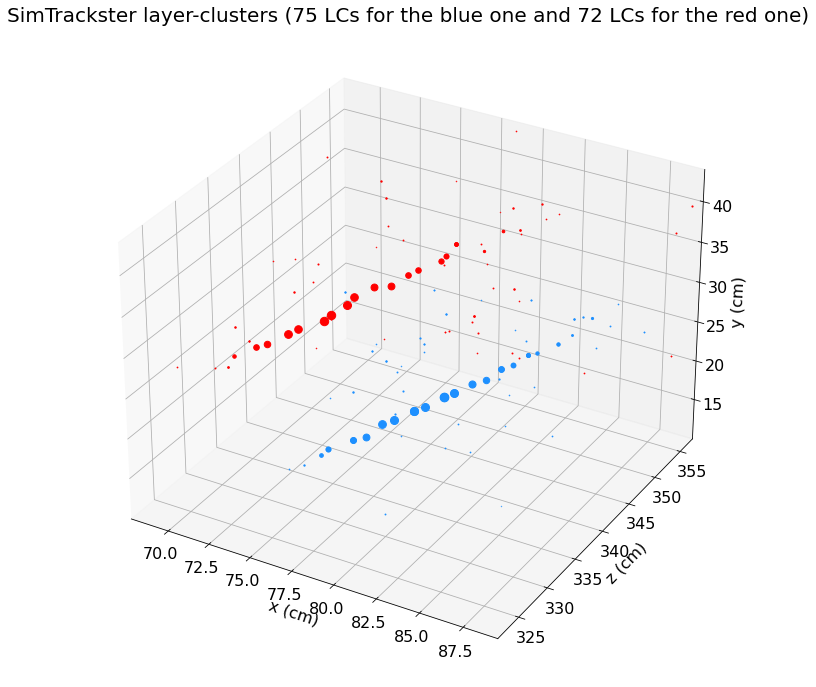

In [23]:
eid = 1

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_ylim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax1.scatter(x, z, y, s=8*e, c='dodgerblue')

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c='red')

ax1.set_title(f"SimTrackster layer-clusters ({len(tx1)} LCs for the blue one and {len(tx2)} LCs for the red one)")
plt.show()

In [24]:
%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_ylim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_zlim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
blue = 0
for x, y, z, e, t in zip(tx1, ty1, tz1, te1, tt1):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='dodgerblue', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t) , size=12) #+ (x**2+y**2+z**2)**0.5/C)
        blue += 1

red = 0
for x, y, z, e, t in zip(tx2, ty2, tz2, te2, tt2):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='r', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t), size=12) #+ (x**2+y**2+z**2)**0.5/C
        red += 1

ax1.set_title(f"SimTrackster layer-clusters with time\n({blue} LCs for the blue one and {red} LCs for the red one)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …